In [8]:
%matplotlib inline
import csv
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
from datetime import date
import re
from geopy.geocoders import Nominatim
from mpl_toolkits.basemap import Basemap

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as col
from matplotlib.dates import  DateFormatter
import seaborn as sns
from config import DATA_PATH,MAIN_FILE
import PandasHelper as pdh


In [2]:
def get_coordinates(address):
    geolocator = Nominatim()
    print geolocator
    location = geolocator.geocode(address)
    print(location.address)

    return location.latitude, location.longitude

def add_coordinates_to_sites():
    df = pd.read_csv(DATA_PATH+"indexes/sites_ix.csv")
    df['address']=  df.site_name.str.replace("BF ","")
    df.address=df.address.str.extract('^(.*?)\(')
    df['coordinates']= df.address.apply(get_coordinates)
    df['x_coordinate']= df.coordinates.apply(lambda x : x[0])
    df['y_coordinate']= df.coordinates.apply(lambda x : x[1])
    df = df.drop('coordinates', 1)
    df.to_csv(DATA_PATH+"/indexes/sites_ix_new.csv",index=False)
    


In [9]:
def draw_map(lats,lons):
   
    m = Basemap(llcrnrlon=4,llcrnrlat=47,urcrnrlon=20,urcrnrlat=56.0, 
                resolution='l',projection='cass',lon_0=13.5086876,lat_0= 52.5485208) 

    lats = [53.082478,53.8758499, 54.2894659] 

    lons = [8.8127559392, 6.7768842, 9.4911024] 

    x, y = m(lons, lats) # forgot this line 
    m.plot(x, y, 'D-', markersize=10, linewidth=1, color='#ff2a6a', markerfacecolor='b') 
    m.drawcoastlines() 
    m.etopo()
    
    plt.show() 

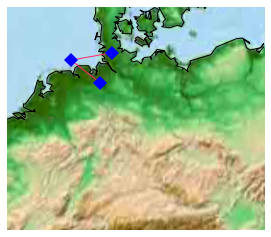

In [10]:
draw_map(1,2)

In [4]:
def draw_map(lats,lons):
   
    m = Basemap(llcrnrlon=4,llcrnrlat=47,urcrnrlon=20,urcrnrlat=56.0, 
                resolution='l',projection='cass',lon_0=13.5086876,lat_0= 52.5485208) 

   
    x, y = m(lons, lats) 
    m.plot(x, y, 'D-', markersize=10, linewidth=1, color='#ff2a6a', markerfacecolor='b') 
    m.drawcoastlines() 
    m.etopo()
    
    plt.show() 